In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

# Identify the stock most correlated with ICICI Bank&#39;s stockprice

In [2]:
# ICICI Bank Security Code - 532174
df = pd.read_csv('Output.csv')

In [3]:
df.head()

,Unnamed: 0,Security Code,Security Id,Security Name,Status,Group,Face Value,ISIN No,Industry,Instrument,Close 2016,Close 2017,Close 2018,Close 2019,Close 2020,Close 2021
0,0,500002,ABB,ABB India Limited,Active,A,2.0,INE117A01022,Heavy Electrical Equipment,Equity,"1,039.10","1,399.50","1,332.00","1,284.10","1,212.15","1,313.05"
1,1,500003,AEGISLOG,AEGIS LOGISTICS LTD.,Active,A,1.0,INE208C01025,Oil Marketing & Distribution,Equity,128.45,286.35,204.20,193.50,251.80,258.25
2,2,500008,AMARAJABAT,AMARA RAJA BATTERIES LTD.,Active,A,1.0,INE885A01032,Auto Parts & Equipment,Equity,871.60,840.55,742.75,724.50,925.15,"1,002.10"
3,3,500009,AMBALALSA,AMBALAL SARABHAI ENTERPRISES LTD.,Active,X,10.0,INE432A01017,Pharmaceuticals,Equity,7.24,10.36,13.24,15.69,20.25,23.80
4,4,500010,HDFC,HOUSING DEVELOPMENT FINANCE CORP.LTD.,Active,A,2.0,INE001A01036,Housing Finance,Equity,"1,262.45","1,710.40","1,970.00","2,413.45","2,558.60","2,653.40"


In [4]:
df['Close 2016'] = df['Close 2016'].str.replace(',', '').astype(float)
df['Close 2017'] = df['Close 2017'].str.replace(',', '').astype(float)
df['Close 2018'] = df['Close 2018'].str.replace(',', '').astype(float)
df['Close 2019'] = df['Close 2019'].str.replace(',', '').astype(float)
df['Close 2020'] = df['Close 2020'].str.replace(',', '').astype(float)
df['Close 2021'] = df['Close 2021'].str.replace(',', '').astype(float)

df['Close 2016'] = df['Close 2016'].astype(str)
df['Close 2017'] = df['Close 2017'].astype(str)
df['Close 2018'] = df['Close 2018'].astype(str)
df['Close 2019'] = df['Close 2019'].astype(str)
df['Close 2020'] = df['Close 2020'].astype(str)
df['Close 2021'] = df['Close 2021'].astype(str)

In [5]:
df['Close'] = df['Close 2016'] + ',' + df['Close 2017'] + ',' + df['Close 2018'] + ',' + df['Close 2019'] + ',' + df['Close 2020'] + ',' + df['Close 2021']

In [6]:
df.head()

,Unnamed: 0,Security Code,Security Id,Security Name,Status,Group,Face Value,ISIN No,Industry,Instrument,Close 2016,Close 2017,Close 2018,Close 2019,Close 2020,Close 2021,Close
0,0,500002,ABB,ABB India Limited,Active,A,2.0,INE117A01022,Heavy Electrical Equipment,Equity,1039.1,1399.5,1332.0,1284.1,1212.15,1313.05,"1039.1,1399.5,1332.0,1284.1,1212.15,1313.05"
1,1,500003,AEGISLOG,AEGIS LOGISTICS LTD.,Active,A,1.0,INE208C01025,Oil Marketing & Distribution,Equity,128.45,286.35,204.2,193.5,251.8,258.25,"128.45,286.35,204.2,193.5,251.8,258.25"
2,2,500008,AMARAJABAT,AMARA RAJA BATTERIES LTD.,Active,A,1.0,INE885A01032,Auto Parts & Equipment,Equity,871.6,840.55,742.75,724.5,925.15,1002.1,"871.6,840.55,742.75,724.5,925.15,1002.1"
3,3,500009,AMBALALSA,AMBALAL SARABHAI ENTERPRISES LTD.,Active,X,10.0,INE432A01017,Pharmaceuticals,Equity,7.24,10.36,13.24,15.69,20.25,23.8,"7.24,10.36,13.24,15.69,20.25,23.8"
4,4,500010,HDFC,HOUSING DEVELOPMENT FINANCE CORP.LTD.,Active,A,2.0,INE001A01036,Housing Finance,Equity,1262.45,1710.4,1970.0,2413.45,2558.6,2653.4,"1262.45,1710.4,1970.0,2413.45,2558.6,2653.4"


In [7]:

icici_stockprice = df[df['Security Code'] == 532174]['Close'].tolist()[0].split(',')
icici_stockprice = [float(x) for x in icici_stockprice]
correlation = []
close = df['Close'].tolist()
for i in range(len(close)):
    value = close[i].split(',')
    close[i] = [float(x) for x in value]
    if np.isnan(np.sum(close[i])):
        correlation.append(np.nan)
    else:
        correlation.append(pearsonr(icici_stockprice, close[i])[0])
df['Correlation'] = correlation
# # correlation
df["Correlation"]

C:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


0       0.258093
1       0.383551
2       0.234146
3       0.908297
4       0.975511
          ...   
4163         NaN
4164         NaN
4165         NaN
4166         NaN
4167         NaN
Name: Correlation, Length: 4168, dtype: float64

In [8]:
icici_corr = df.sort_values(by="Correlation",ascending=False)
icici_corr.head()

,Unnamed: 0,Security Code,Security Id,Security Name,Status,Group,Face Value,ISIN No,Industry,Instrument,Close 2016,Close 2017,Close 2018,Close 2019,Close 2020,Close 2021,Close,Correlation
2353,2353,532174,ICICIBANK,ICICI BANK LTD.,Active,A,2.0,INE090A01021,Banks,Equity,255.3,314.0,360.0,538.75,534.8,542.1,"255.3,314.0,360.0,538.75,534.8,542.1",1.000000
1728,1728,526807,SEAMECLTD,SEAMEC LTD.,Active,B,10.0,INE497B01018,Shipping,Equity,80.7,182.1,201.0,465.6,448.5,480.4,"80.7,182.1,201.0,465.6,448.5,480.4",0.996151
3209,3209,539097,HKG,HKG Ltd,Active,M,2.0,INE904R01027,Comm.Trading & Distribution,Equity,5.9,8.0,18.6,42.4,40.0,42.8,"5.9,8.0,18.6,42.4,40.0,42.8",0.993245
2028,2028,531179,ARMANFIN,ARMAN FINANCIAL SERVICES LTD.,Active,A,10.0,INE109C01017,Finance (including NBFCs),Equity,179.35,256.65,405.0,633.0,736.2,714.2,"179.35,256.65,405.0,633.0,736.2,714.2",0.985292
1158,1158,517264,FINELINE,FINE-LINE CIRCUITS LTD.,Active,X,10.0,INE087E01011,Electronic Components,Equity,11.66,15.37,17.7,27.5,25.0,24.45,"11.66,15.37,17.7,27.5,25.0,24.45",0.984190


# Draw a correlation matrix of any 30 stocks on the Sensex. This is a matrix with both axes holding the stock names. The colour of each cell is the correlation between that pair of stocks: red for -1 and green for 1.

In [9]:
security_code = df['Security Code'].tolist()[0:8]
security_code += df['Security Code'].tolist()[9:31]
security_code = [str(x) for x in security_code]
close = df['Close'].tolist()[0:8]
close += df['Close'].tolist()[9:31]
data = {}

for i in range(len(close)):
    close[i] = [float(x) for x in close[i].split(',')]
    data[security_code[i]] = close[i]

corr_30 = pd.DataFrame(data,columns=data.keys())
corrMatrix = corr_30.corr()
fig = px.imshow(corrMatrix, color_continuous_scale=["red", "green"])
fig.show()

# Draw a sparkline showing the data 23,80,92,62,98,7,9,56,19,68.

In [12]:
l = [23,80,92,62,98,7,9,56,19,68]
fig = px.line(l,title='Sparkline Plot')
fig.show()

# Create an SVG file that reproduces this bubble chart in SVG

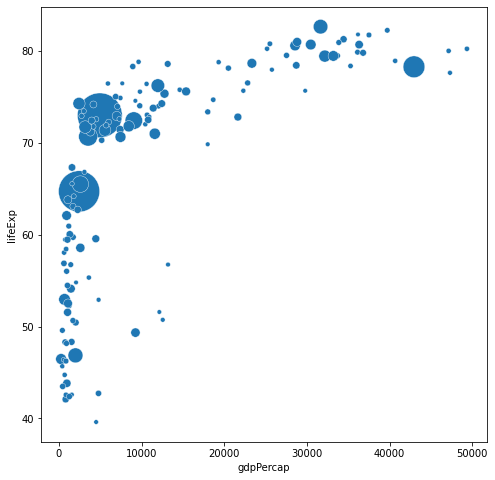

In [14]:
from gapminder import gapminder # import data set 

plt.rcParams['figure.figsize'] = [8, 8]

data = gapminder.loc[gapminder.year == 2007]
 
bubble_chart = sn.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

bubble_chart.figure.savefig("Bubble Chart.svg")
plt.show()

# For each stock, draw a sparkline showing last month&#39;s closing price trend

In [16]:
df_months = pd.read_csv('Output_Months.csv')

df_months['Close Jan 21'] = df_months['Close Jan 21'].str.replace(',', '').astype(float)

last_month = df_months['Close Jan 21'].tolist()
fig = px.line(last_month, title='Sparkline Plot')
fig.show()
fig.write_html('Stock_Sparkline_Plot.html')


# Convert these files into PDF without using a browser

In [18]:
import pdfcrowd
client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('Stock_Sparkline_Plot.html', 'Stock_Sparkline_Plot.pdf')